In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_pathway_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
# 
df_pathway_att = df_pathway_att[df_pathway_att['cell_line'].isin(['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)
df_pathway_att.head()

(2705, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,5-Fluorouracil,HCC827,LUAD,0.001369,0.001426,0.001540,0.002264,0.001739,0.001743,0.001756,...,0.001509,0.001329,0.001365,0.001443,0.001413,0.001735,0.002677,0.001404,0.002237,0.001536
1,5-azacytidine,HCC827,LUAD,0.001556,0.001327,0.001549,0.002153,0.001751,0.001593,0.001424,...,0.001550,0.001314,0.001348,0.001411,0.001411,0.001747,0.002680,0.001549,0.002575,0.001526
2,A-366,HCC827,LUAD,0.001391,0.001622,0.001523,0.001685,0.001708,0.001727,0.001567,...,0.001524,0.001405,0.001509,0.001394,0.001567,0.001561,0.002652,0.001285,0.002561,0.001581
3,ABT737,HCC827,LUAD,0.001371,0.001472,0.001551,0.001253,0.001746,0.001757,0.001596,...,0.001371,0.001404,0.001544,0.001479,0.001595,0.001588,0.002382,0.001216,0.002352,0.001505
4,AGI-5198,HCC827,LUAD,0.001361,0.001451,0.001533,0.001655,0.001740,0.001577,0.001578,...,0.001534,0.001364,0.001502,0.001404,0.001403,0.001734,0.002483,0.001392,0.002451,0.001517


In [3]:
# 根据drug进行分组计数
df_pathway_att.groupby('drug')['cell_line'].count()

drug
5-Fluorouracil       13
5-azacytidine        10
A-366                10
ABT737               13
AGI-5198             13
                     ..
YK-4-279             13
ZM447439             13
Zoledronate          10
alpha-lipoic acid    10
glutathione          10
Name: cell_line, Length: 233, dtype: int64

In [4]:

# 筛选出drug  = Oxaliplatin,ABT737,Axitinib,Navitoclax,Picolinici-acid,Camptothecin,BMS-754807,Vorinostat,Docetaxel,JQ1
df_pathway_att_top10_drug = df_pathway_att[df_pathway_att['drug'].isin(['Oxaliplatin','ABT737','Axitinib','Navitoclax','Camptothecin','Vorinostat','Docetaxel','JQ1'])]
# 重置索引
df_pathway_att_top10_drug = df_pathway_att_top10_drug.reset_index(drop=True)
print(df_pathway_att_top10_drug.shape)
df_pathway_att_top10_drug.head()

(104, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,ABT737,HCC827,LUAD,0.001371,0.001472,0.001551,0.001253,0.001746,0.001757,0.001596,...,0.001371,0.001404,0.001544,0.001479,0.001595,0.001588,0.002382,0.001216,0.002352,0.001505
1,Axitinib,HCC827,LUAD,0.001358,0.001642,0.001533,0.001674,0.001564,0.001565,0.001576,...,0.001533,0.001209,0.001505,0.001576,0.001402,0.001731,0.002398,0.001232,0.002556,0.001546
2,Camptothecin,HCC827,LUAD,0.001358,0.001629,0.001532,0.001345,0.001681,0.001708,0.001578,...,0.001533,0.001379,0.001506,0.001416,0.001403,0.001562,0.002675,0.001415,0.002566,0.001509
3,Docetaxel,HCC827,LUAD,0.001366,0.001604,0.001541,0.001511,0.001609,0.001748,0.001411,...,0.001366,0.001381,0.001541,0.001587,0.001586,0.001509,0.002515,0.001388,0.002321,0.001476
4,JQ1,HCC827,LUAD,0.001361,0.001468,0.001535,0.001787,0.001741,0.001579,0.001580,...,0.001535,0.001351,0.001500,0.001404,0.001402,0.001731,0.002483,0.001388,0.002449,0.001515


In [5]:
# 取df_pathway_att_top10_drug前三列数据
df_pathway_att_top10_drug_OncotreeCode = df_pathway_att_top10_drug.iloc[:, :3]
# 去重
df_pathway_att_top10_drug_OncotreeCode = df_pathway_att_top10_drug_OncotreeCode.drop_duplicates()
# 重置索引
df_pathway_att_top10_drug_OncotreeCode = df_pathway_att_top10_drug_OncotreeCode.reset_index(drop=True)
print(df_pathway_att_top10_drug_OncotreeCode.shape)
df_pathway_att_top10_drug_OncotreeCode.head()

(104, 3)


,drug,cell_line,OncotreeCode
0,ABT737,HCC827,LUAD
1,Axitinib,HCC827,LUAD
2,Camptothecin,HCC827,LUAD
3,Docetaxel,HCC827,LUAD
4,JQ1,HCC827,LUAD


In [19]:
# 对df_pathway_att_top10_drug从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_pathway_att_top10_drug.iloc[:, 3:])
df_pathway_att_top10_drug_pca = pca.transform(df_pathway_att_top10_drug.iloc[:, 3:])
df_pathway_att_top10_drug_pca.shape

(104, 2)

In [20]:
# 将降维后的数据转换成dataframe
df_pathway_att_top10_drug_pca = pd.DataFrame(df_pathway_att_top10_drug_pca)
df_pathway_att_top10_drug_pca.columns = ['pca_1', 'pca_2']
df_pathway_att_top10_drug_pca.insert(0, 'drug', df_pathway_att_top10_drug['drug'])
df_pathway_att_top10_drug_pca.insert(1, 'OncotreeCode', df_pathway_att_top10_drug['OncotreeCode'])
print(df_pathway_att_top10_drug_pca.shape)
df_pathway_att_top10_drug_pca.head()

(104, 4)


,drug,OncotreeCode,pca_1,pca_2
0,ABT737,LUAD,0.003352,-0.000110
1,Axitinib,LUAD,-0.001793,-0.001148
2,Camptothecin,LUAD,-0.001984,-0.000914
3,Docetaxel,LUAD,0.002826,-0.000317
4,JQ1,LUAD,-0.001364,-0.001493


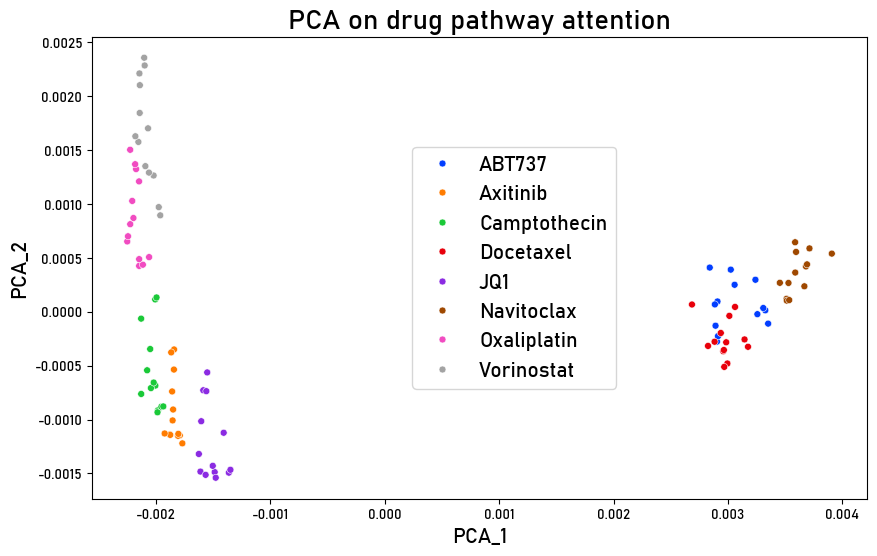

In [25]:
# 使用seaborn画图
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='drug', data=df_pathway_att_top10_drug_pca, s=25,palette='bright')
# 设置标签居中
plt.legend(loc='center left', bbox_to_anchor=(0.4, 0.5), ncol=1, fontsize=15)


# title
plt.title('PCA on drug pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('10_drug_pathway_attention_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

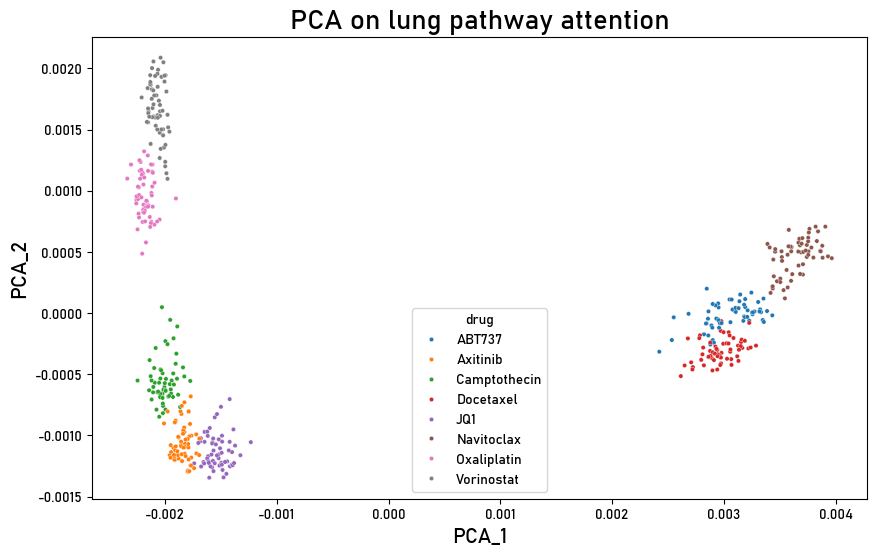

In [44]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='drug', data=df_pathway_att_top10_drug_pca, s=10)
# title
plt.title('PCA on lung pathway attention', fontsize=20)
# 设置标签居中
plt.legend(loc='center left', bbox_to_anchor=(0.4, 0.5), ncol=1, fontsize=15)
# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_top10_drug_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0     LUAD
1     LUAD
2     LUAD
3     LUAD
4     LUAD
      ... 
86    SCLC
87    SCLC
88    SCLC
89    SCLC
90    SCLC
Name: OncotreeCode, Length: 91, dtype: object

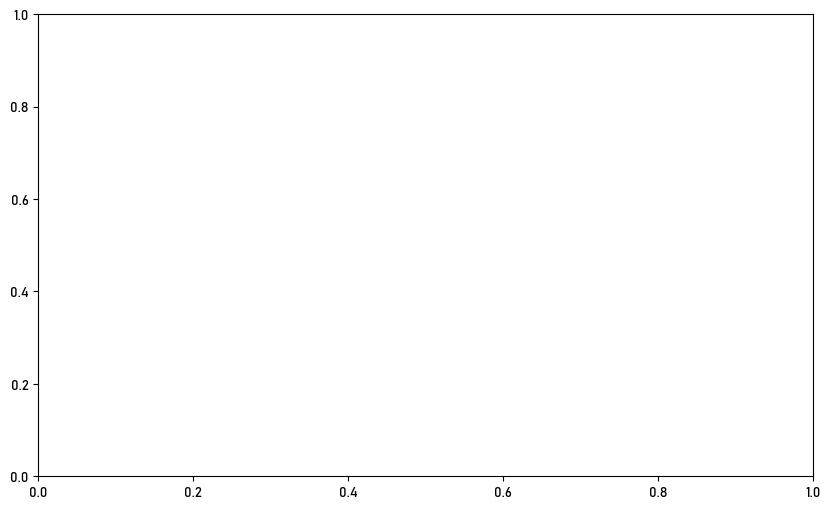

In [15]:
# 画出散点图，根据drug进行着色
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x=df_pathway_att_top10_drug_pca['pca_1'], y=df_pathway_att_top10_drug_pca['pca_2'], c=df_pathway_att_top10_drug_pca['OncotreeCode'], s=3)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
# ax.spines['left'].set_linewidth(1)  # Y轴线宽
# ax.spines['bottom'].set_linewidth(1)

# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_top10_drug.png', dpi=300, bbox_inches='tight')

plt.show()


In [4]:
# 将df_LUNG根据cell_line分组，再取每组drug列的交集
df_pathway_att_drug = df_pathway_att.groupby('cell_line')['drug'].apply(set).reset_index()
# 将df_LUNG_drug中的drug取交集
drugs = set.intersection(*df_pathway_att_drug['drug'])
print(len(drugs))
# 取df_LUNG中drug中在drugs中的数据
df_pathway_att = df_pathway_att[df_pathway_att['drug'].isin(drugs)]
# TODO:去掉drug = ABT737,AZD5582,Dactinomycin,Docetaxel,GSK1904529A,Navitoclax,Paclitaxel,Sabutoclax,Venetoclax
df_pathway_att = df_pathway_att[~df_pathway_att['drug'].isin(['ABT737','AZD5582','Dactinomycin','Docetaxel','GSK1904529A','Navitoclax','Paclitaxel','Sabutoclax','Venetoclax'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)

144
(1755, 622)


In [5]:
# 取df_pathway_att前三列数据
df_pathway_att_OncotreeCode = df_pathway_att.iloc[:, :3]
# 去掉第一列数据
# df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop(['drug'], axis=1)
# 去重
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop_duplicates()
# 重置索引
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.reset_index(drop=True)
print(df_pathway_att_OncotreeCode.shape)
df_pathway_att_OncotreeCode.head()

(1755, 3)


,drug,cell_line,OncotreeCode
0,5-Fluorouracil,HCC827,LUAD
1,AGI-5198,HCC827,LUAD
2,AGI-6780,HCC827,LUAD
3,AGK2,HCC827,LUAD
4,AZ960,HCC827,LUAD


In [6]:
# 对df_pathway_att从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca = pca.transform(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca.shape

(1755, 2)

In [7]:
# 将降维后的数据转换成dataframe
df_pathway_att_pca = pd.DataFrame(df_pathway_att_pca)
df_pathway_att_pca.columns = ['pca_1', 'pca_2']
df_pathway_att_pca.insert(0, 'cell_line', df_pathway_att['cell_line'])
df_pathway_att_pca.insert(1, 'OncotreeCode', df_pathway_att['OncotreeCode'])
# 将pca_1>0.002的数据标注出来，方便后面的数据分析
df_pathway_att_pca['pca_1>0.002'] = df_pathway_att_pca['pca_1'].apply(lambda x: 1 if x>0.002 else 0)
print(df_pathway_att_pca.shape)
df_pathway_att_pca.head()

(1755, 5)


,cell_line,OncotreeCode,pca_1,pca_2,pca_1>0.002
0,HCC827,LUAD,0.000089,-0.001395,0
1,HCC827,LUAD,-0.001012,0.000205,0
2,HCC827,LUAD,-0.001130,0.000511,0
3,HCC827,LUAD,-0.000893,-0.000370,0
4,HCC827,LUAD,-0.000585,-0.001102,0


In [8]:
# 将df_pathway_att_pca与df_pathway_att_OncotreeCode合并,按照index
# df_pathway_att_pca = pd.concat([df_pathway_att_pca, df_pathway_att_OncotreeCode], axis=1)
# print(df_pathway_att_pca.shape)
# df_pathway_att_pca.head()

In [9]:
# 设置颜色
# ['#984EA3','#FF7F00','#E41A1C','#4DAF4A','#377EB8']
# 设置颜色方案
palette = {'LUAD':'#984EA3', 
           'LCLC':'#FF7F00', 
           'NSCLC':'#4DAF4A',
           'LUSC':'#377EB8',
           'SCLC':'#E41A1C'}
# palette = {'LUAD':'#b9f2f0', 
#            'LCLC':'#d0bbff', 
#            'NSCLC':'#ff9f9b',
#            'LUSC':'#a6d854',
#            'SCLC':'#66c2a5'}
# 将df_pathway_att_pca的OncotreeCode列的值替换成颜色
df_pathway_att_pca['OncotreeCode'] = df_pathway_att_pca['OncotreeCode'].map(palette)

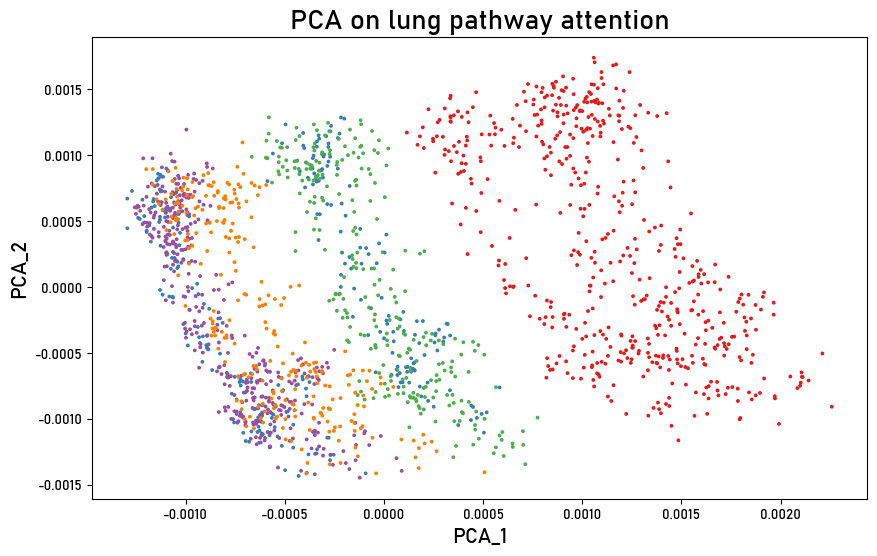

In [10]:
# 画出散点图，按照OncotreeCode进行着色
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.scatter(x=df_pathway_att_pca['pca_1'], y=df_pathway_att_pca['pca_2'], c=df_pathway_att_pca['OncotreeCode'], s=3)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
# ax.spines['left'].set_linewidth(1)  # Y轴线宽
# ax.spines['bottom'].set_linewidth(1)

# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

plt.savefig('LUNG_pathway_attention_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

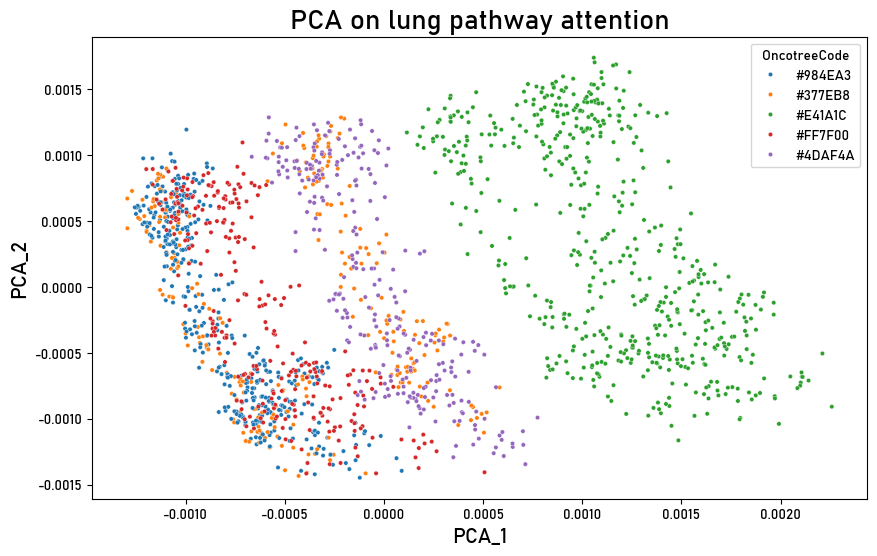

In [27]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='OncotreeCode', data=df_pathway_att_pca, s=10)
# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()